In [1]:
import tensorflow as tf
import os


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
batch = data.as_numpy_iterator().next()

2023-03-09 17:35:31.522062: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [6]:
len(batch)

2

In [7]:
batch[0].shape

(32, 256, 256, 3)

In [8]:
batch[1].shape

(32,)

## Exploratory Data Analysis

In [15]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd


(2000, 2000, 3)


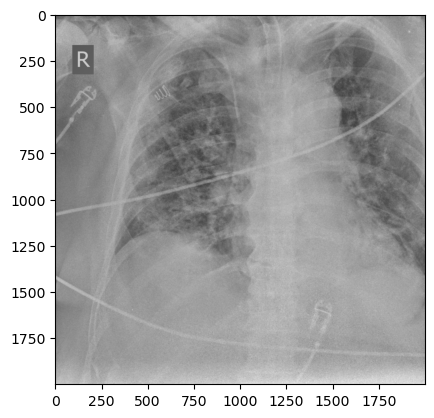

In [4]:
def sample_image(sample_image_path):
    img = load_img(sample_image_path)
    print((img_to_array(img)).shape)
    plt.imshow(img)
    plt.show()
sample_image_path = "./data/train/COVID19/COVID19(0).jpg"
sample_image(sample_image_path)

In [12]:
dataDir = './data//train/'
os.listdir(dataDir)

['.DS_Store', 'test', 'train', 'val']

In [16]:
paths = []
labels = []

dataDir = './data//train/'
for label in os.listdir(dataDir):
    if (label == '.DS_Store'):
        continue
    for image in os.listdir(os.path.join(dataDir, label)):
        paths.append(os.path.join(dataDir,label)+'/'+image)
        labels.append(label)
paths, labels = shuffle(paths, labels)
df = pd.DataFrame({'path':paths, 'label':labels})
df


,path,label
0,./data//train/NORMAL/NORMAL2-IM-0523-0001.jpeg,NORMAL
1,./data//train/NORMAL/IM-0691-0001.jpeg,NORMAL
2,./data//train/PNEUMONIA/person1021_virus_1711....,PNEUMONIA
3,./data//train/NORMAL/IM-0404-0001.jpeg,NORMAL
4,./data//train/PNEUMONIA/person1005_virus_1688....,PNEUMONIA
...,...,...
6321,./data//train/PNEUMONIA/person162_virus_320.jpeg,PNEUMONIA
6322,./data//train/COVID19/COVID19(291).jpg,COVID19
6323,./data//train/PNEUMONIA/person1422_virus_2434....,PNEUMONIA
6324,./data//train/TURBERCULOSIS/Tuberculosis-349.png,TURBERCULOSIS


In [25]:
df['label'].value_counts()

PNEUMONIA        3875
NORMAL           1341
TURBERCULOSIS     650
COVID19           460
Name: label, dtype: int64

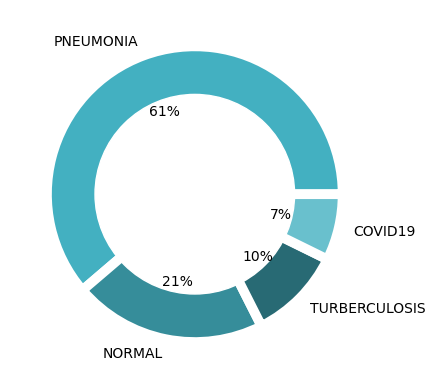

In [27]:
plt.pie(list(df.label.value_counts()),
        labels=list(df.label.value_counts().index),
        colors=['#43b0c1', '#368d9a', '#286a74', '#69c0cd'],
        autopct='%.0f%%', wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

my_circle=plt.Circle((0,0), 0.675, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [12]:
class config:
    IMAGE_SIZE = 128

    # Data Augmentation
    BRIGHTNESS = (0.64, 1.37) # (MIN, MAX)
    CONTRAST   = (0.64, 1.37) # (MIN, MAX)

    # Train-Val Split
    TRAIN_VAL_SPLIT = 0.8 # 80% of all the samples are used for training, and the rest for validation

    # Model Training
    BATCH_SIZE = 8
    EPOCHS = 20
    LEARNING_RATE = 0.00008

## Data PreProcessing

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('./data/train')

testData = tf.keras.utils.image_dataset_from_directory('./data/test')

valData = tf.keras.utils.image_dataset_from_directory('./data/val')

Found 6326 files belonging to 4 classes.
Found 771 files belonging to 4 classes.
Found 38 files belonging to 4 classes.
